In [ ]:
# pseudotime?

In [5]:
library(Seurat)
library(SingleCellExperiment)
library(dplyr)
library(slingshot)

In [7]:
sc1 = readRDS('chicken_integrated_data_v2.rds')
sc1

An object of class Seurat 
17007 features across 58340 samples within 1 assay 
Active assay: RNA (17007 features, 0 variable features)
 2 layers present: counts, data

In [9]:
id1 = which(sc1$broad_type %in% c('aCM', 'immature CM', 'vCM'))
mat = LayerData(sc1, assay = 'RNA', layer = 'counts')
sce = SingleCellExperiment(list(counts = mat[,id1]), colData = DataFrame(sc1@meta.data[id1,]))
sce

class: SingleCellExperiment 
dim: 17007 25999 
metadata(0):
assays(1): counts
rownames(17007): SPRY2 PCDH20 ... ENSGALG00010000495 ENSGALG00010000377
rowData names(0):
colnames(25999): stage23_sample3_AAACCCACAACAGAGC-1
  stage23_sample3_AAACCCAGTCCATACA-1 ...
  stage32_sample12_TTTGTTGCAAGGCAAC-1
  stage32_sample12_TTTGTTGCACAAGTGG-1
colData names(11): orig.ident nCount_RNA ... broad_type cluster
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

In [10]:
# filter genes down to potential cell-type markers
# at least M (15) reads in at least N (15) cells
geneFilter <- apply(assays(sce)$counts,1,function(x){
    sum(x >= 3) >= 10
})
sce <- sce[geneFilter, ]

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 3.3 GiB”


In [12]:
# normalize data
FQnorm <- function(counts){
    rk <- apply(counts,2,rank,ties.method='min')
    counts.sort <- apply(counts,2,sort)
    refdist <- apply(counts.sort,1,median)
    norm <- apply(rk,2,function(r){ refdist[r] })
    rownames(norm) <- rownames(counts)
    return(norm)
}
assays(sce)$norm <- FQnorm(assays(sce)$counts)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.4 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.4 GiB”


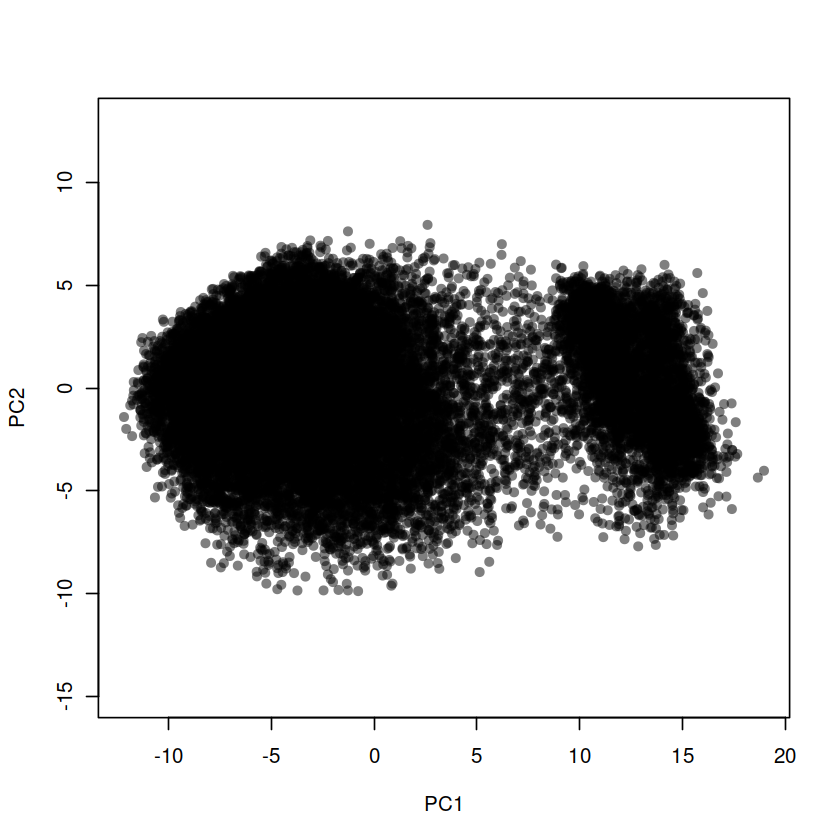

In [13]:
# dim red with pca
pca <- prcomp(t(log1p(assays(sce)$norm)), scale. = FALSE)
rd1 <- pca$x[,1:2]

plot(rd1, col = rgb(0,0,0,.5), pch=16, asp = 1)

In [ ]:
# umap
library(uwot)

In [ ]:
rd2 <- uwot::umap(t(log1p(assays(sce)$norm)))
colnames(rd2) <- c('UMAP1', 'UMAP2')

plot(rd2, col = rgb(0,0,0,.5), pch=16, asp = 1)

In [14]:
reducedDims(sce) <- SimpleList(PCA = rd1, UMAP = rd2)

In [21]:
head(cbind(sce$broad_type,cl1,brewer.pal(9,"Set1")[cl1]))

cl1        
[1,] aCM         1   #E41A1C
[2,] vCM         3   #4DAF4A
[3,] aCM         1   #E41A1C
[4,] aCM         1   #E41A1C
[5,] vCM         3   #4DAF4A
[6,] immature CM 2   #377EB8

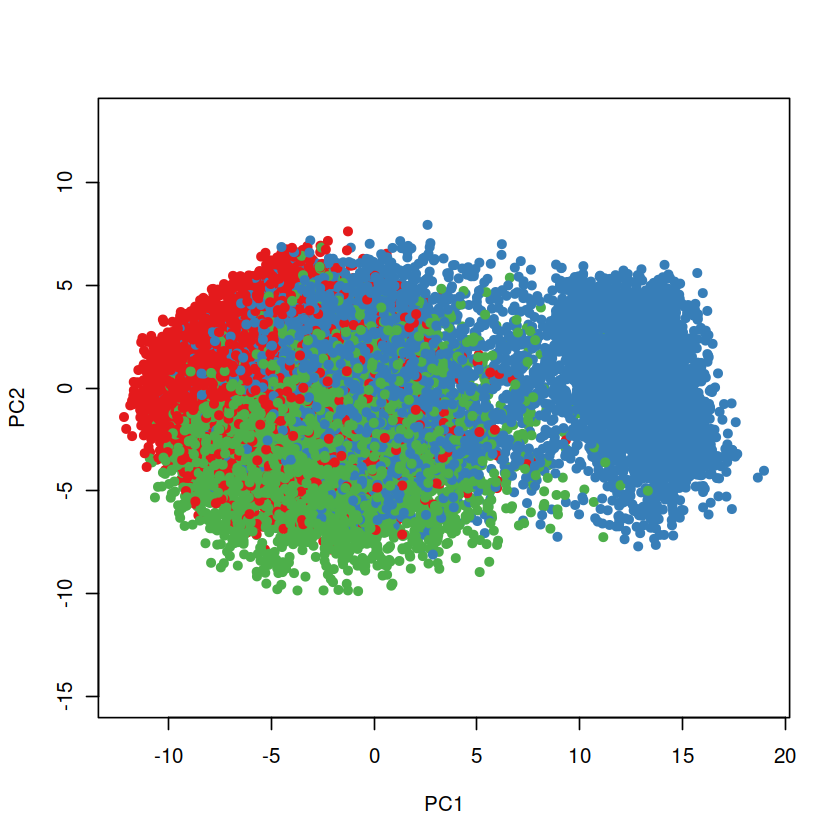

In [17]:
library(RColorBrewer)
cl1 = as.factor(sce$broad_type)
plot(rd1, col = brewer.pal(9,"Set1")[cl1], pch=16, asp = 1)